# 1. Step 0: Import modules and installing PAMI

In [107]:
!pip install -U PAMI

In [108]:
import pandas as pd
import numpy as np
from PAMI.extras.convert import denseDF2DB as db
from PAMI.frequentPattern.basic import FPGrowth as ab
from PAMI.extras.graph import visualizePatterns as fig

# 2. Step 1: Read data file

In [109]:
# Read the dataframe of the file
df = pd.read_csv( "./output.csv" )
df.head( 5 )

,Timestamp,POINT(141.3532777 43.06225480000001)_x,POINT(141.3252375 43.0396273),POINT(141.3532777 43.06225480000001)_y,POINT(141.3445286 43.0409769),POINT(141.3711567 43.1453261),POINT(141.3331053 43.0820313),POINT(141.3483898 43.0843826),POINT(141.3587536 43.0839536),POINT(141.3741522 43.1037853),...,POINT(127.6856834 26.2156831),POINT(125.2876685 24.8032189),POINT(124.1871751 24.3404034),POINT(127.7235186 26.2674837),POINT(127.9876849 26.593427),POINT(127.6656429 26.1460274),POINT(127.8197995 26.3478034),POINT(128.1779451 26.7456488),POINT(127.9723621 26.3565509),POINT(127.7578588 26.2219792)
0,2025-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,...,NaN,18.0,17.0,NaN,14.0,NaN,14.0,12.0,NaN,NaN
1,2025-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,19.0,14.0,NaN,13.0,NaN,15.0,12.0,NaN,NaN
2,2025-06-01 03:00:00,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,18.0,15.0,NaN,14.0,NaN,13.0,13.0,NaN,NaN
3,2025-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,18.0,12.0,NaN,14.0,NaN,15.0,11.0,NaN,NaN
4,2025-06-01 05:00:00,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,...,NaN,17.0,13.0,NaN,14.0,NaN,15.0,13.0,NaN,NaN


# 3. Step 2: Data preprocessing

## 3.1. Step 2.1: Remove timestamp from dataframe

In [110]:
# Drop the time stamp columns
df = df.drop( "Timestamp", axis=1 )
df.head( 5 )

,POINT(141.3532777 43.06225480000001)_x,POINT(141.3252375 43.0396273),POINT(141.3532777 43.06225480000001)_y,POINT(141.3445286 43.0409769),POINT(141.3711567 43.1453261),POINT(141.3331053 43.0820313),POINT(141.3483898 43.0843826),POINT(141.3587536 43.0839536),POINT(141.3741522 43.1037853),POINT(141.4156654 43.0691627),...,POINT(127.6856834 26.2156831),POINT(125.2876685 24.8032189),POINT(124.1871751 24.3404034),POINT(127.7235186 26.2674837),POINT(127.9876849 26.593427),POINT(127.6656429 26.1460274),POINT(127.8197995 26.3478034),POINT(128.1779451 26.7456488),POINT(127.9723621 26.3565509),POINT(127.7578588 26.2219792)
0,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,NaN,...,NaN,18.0,17.0,NaN,14.0,NaN,14.0,12.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,...,NaN,19.0,14.0,NaN,13.0,NaN,15.0,12.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,...,NaN,18.0,15.0,NaN,14.0,NaN,13.0,13.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,18.0,12.0,NaN,14.0,NaN,15.0,11.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,NaN,NaN,...,NaN,17.0,13.0,NaN,14.0,NaN,15.0,13.0,NaN,NaN


## 3.2. Step 2.2: Convert NaN value to 0 in dataframe

In [111]:
# Fill all NaN value of dataframe as 0
df = df.fillna( 0 )
df.head( 5 )

,POINT(141.3532777 43.06225480000001)_x,POINT(141.3252375 43.0396273),POINT(141.3532777 43.06225480000001)_y,POINT(141.3445286 43.0409769),POINT(141.3711567 43.1453261),POINT(141.3331053 43.0820313),POINT(141.3483898 43.0843826),POINT(141.3587536 43.0839536),POINT(141.3741522 43.1037853),POINT(141.4156654 43.0691627),...,POINT(127.6856834 26.2156831),POINT(125.2876685 24.8032189),POINT(124.1871751 24.3404034),POINT(127.7235186 26.2674837),POINT(127.9876849 26.593427),POINT(127.6656429 26.1460274),POINT(127.8197995 26.3478034),POINT(128.1779451 26.7456488),POINT(127.9723621 26.3565509),POINT(127.7578588 26.2219792)
0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,...,0.0,18.0,17.0,0.0,14.0,0.0,14.0,12.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,...,0.0,19.0,14.0,0.0,13.0,0.0,15.0,12.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,...,0.0,18.0,15.0,0.0,14.0,0.0,13.0,13.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,18.0,12.0,0.0,14.0,0.0,15.0,11.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,...,0.0,17.0,13.0,0.0,14.0,0.0,15.0,13.0,0.0,0.0


## 3.3. Step 2.3: Convert abnormal values to 0 in dataframe

### 3.3.1. Step 2.3.1: Convert values bigger or equal to 100 to 0

<Axes: >

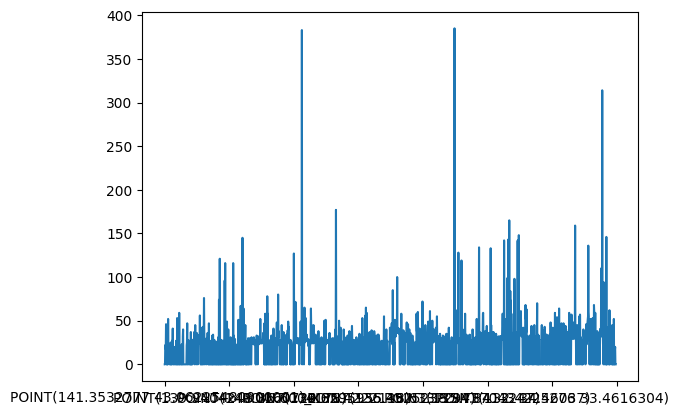

In [112]:
# Shows the maximum PM 2.5 value within dataframe on plot
df.max().plot()

<Axes: >

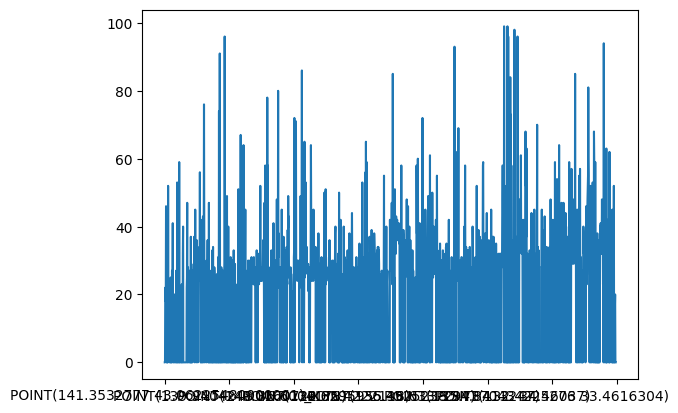

In [113]:
# Change all data that are more than or equal to 100 to 0
df.where( df < 100, 0, inplace=True )
df.max().plot()

### 3.3.2. Step 2.3.2: Convert values smaller than 0 to 0

<Axes: >

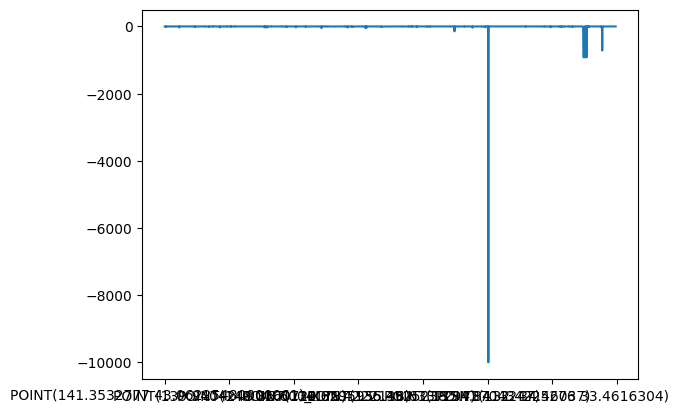

In [114]:
# Shows the minimum PM 2.5 value within dataframe on plot
df.min().plot()

<Axes: >

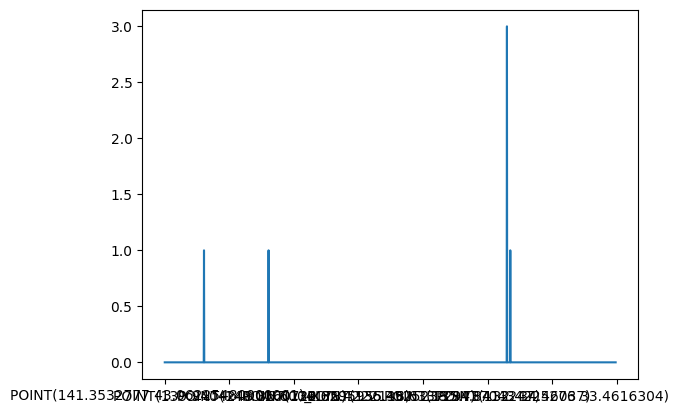

In [115]:
# Change all data that are smaller than 0 to 0
df.where( df >= 0, 0, inplace=True )
df.min().plot()

## 3.4. Step 2.4: Convert dataframe into a transactional database

In [116]:
# Set threshold as the value
THRESHOLD = 15
csvFile = "PM24HeavyPollutionRecordingSensors.csv"

# Turn the dataframe into transactional database and turn it into csv file
obj = db.denseDF2DB( df )
obj.convert2TransactionalDatabase( csvFile, ">=", THRESHOLD )

In [117]:
!head PM24HeavyPollutionRecordingSensors.csv

POINT(140.9984815 42.3223606)	POINT(134.2361504 35.5037675)	POINT(133.7597423 34.5165856)	POINT(133.7708994 34.4767912)	POINT(132.7273863 33.8415709)	POINT(130.9612121 33.8854016)	POINT(130.4461332 33.0301519)	POINT(130.9403851 33.3280901)	POINT(131.8765037 33.2470397)	POINT(131.0796778 31.76077)	POINT(131.061519 31.719543)	POINT(131.3849154 31.60241139999999)	POINT(127.693895 26.2065548)	POINT(125.2876685 24.8032189)	POINT(124.1871751 24.3404034)
POINT(140.9984815 42.3223606)	POINT(134.2361504 35.5037675)	POINT(133.8443247 35.43944500000001)	POINT(133.7597423 34.5165856)	POINT(133.7708994 34.4767912)	POINT(133.8099335 34.4693573)	POINT(133.9478511 34.4899774)	POINT(132.7273863 33.8415709)	POINT(130.9612121 33.8854016)	POINT(130.7597913 33.8615931)	POINT(130.7589282 32.2064635)	POINT(130.0518805 32.512424)	POINT(130.9403851 33.3280901)	POINT(131.061519 31.719543)	POINT(131.3849154 31.60241139999999)	POINT(127.693895 26.2065548)	POINT(125.2876685 24.8032189)	POINT(127.8197995 26.3478034

# 4. Step 3: Discover knowledge from transactional database

In [118]:
# Set minSup value
minSup = 300
paraTxt = "frequentPatterns.txt"

# Implement the FP-growth algorithm and save parameters data into a file
obj = ab.FPGrowth( csvFile, minSup ) #If the execution is taking too much time, kill the process and use a higher minimum support value.
obj.mine()
obj.printResults()
obj.save( paraTxt ) # It is a good practise to store the parameters used for an experiment as a file name

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 1510
Total Memory in USS: 662052864
Total Memory in RSS 682762240
Total ExecutionTime in ms: 0.758591890335083


In [119]:
!head frequentPatterns.txt

POINT(134.8776041 34.743471):300
POINT(132.5095822 34.5185624):300
POINT(135.4580715 34.5435805):301
POINT(135.0609007 34.6287768):301
POINT(132.2165637 34.1698473):301
POINT(134.8224735 34.8271403):301
POINT(134.86795 34.7153597):302
POINT(132.4234875 34.3919777):303
POINT(134.0347077 34.2334691):303
POINT(132.535839 34.4459346):304


# 5. Step 4: Visualizing pattern found

## 5.1. Step 4.1: Convert found pattern point to lowercase

In [120]:
# This happens due to geometry data from database are in uppercase form
with open( paraTxt, "r+" ) as f:
    # Read all lines and put it into a list
    rows = f.readlines()

    # Count the current list
    line = 0

    # Go through each line and replace
    for row in rows:
        newRow = row.replace( "POINT", "Point" )
        rows[ line ] = newRow
        line += 1

    # Delete all data within the file
    f.seek( 0 )
    f.truncate( 0 )

    # Write new data into the file
    f.writelines( rows )

## 5.2. Step 4.2: Visualizing found pattern point in the file

In [121]:
# Visualizing data from the parameter pattern
obj = fig.visualizePatterns( paraTxt, 10 )
obj.visualize( width=1000, height=900 )

Number 	 Pattern
2	Point(133.3294451 34.5548708)	Point(133.8171478 34.6075268)	Point(133.4120217 34.5119416)	Point(133.3624239 34.4859845)
3	Point(133.3294451 34.5548708)	Point(133.8528222 34.5880389)	Point(134.4870301 34.8197588)	Point(133.3624239 34.4859845)
4	Point(133.3294451 34.5548708)	Point(133.8528222 34.5880389)	Point(133.4120217 34.5119416)	Point(133.3624239 34.4859845)
5	Point(133.3294451 34.5548708)	Point(138.9338621 35.6081699)	Point(133.4120217 34.5119416)	Point(133.3624239 34.4859845)
6	Point(133.3294451 34.5548708)	Point(134.4870301 34.8197588)	Point(133.4120217 34.5119416)	Point(133.3624239 34.4859845)
7	Point(133.3294451 34.5548708)	Point(134.6414821 33.9635046)	Point(133.3624239 34.4859845)	Point(133.4120217 34.5119416)
8	Point(133.4120217 34.5119416)	Point(134.4870301 34.8197588)	Point(133.8528222 34.5880389)	Point(133.3624239 34.4859845)
9	Point(134.3903396 34.7549367)	Point(133.9856567 34.6841435)	Point(134.4680807 34.8036472)	Point(134.295262 34.7863947)	Point(13

# Link: https://github.com/lamkhanhtran/PAMI